# Environment setup

## Install neccessary tools, libraries, etc.

In [1]:
!pip install -qU diffusers accelerate bitsandbytes transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.6 MB/s eta 0:00:00


In [2]:
  !nvidia-smi

Sat Jul  6 13:48:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Import important libraries

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch

from transformers import (AutoTokenizer, AutoModelForCausalLM,
                          BitsAndBytesConfig,
                          pipeline)
from diffusers import DiffusionPipeline

In [3]:
from google.colab import userdata
from huggingface_hub import login

login(token=userdata.get("HF_TOKEN"),
      add_to_git_credential=True)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Experiment Setup

In [5]:
generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
generator.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
gemma_tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b",
                                                token=userdata.get("HF_TOKEN"))
quantization_config = BitsAndBytesConfig(load_in_4bit=True)
gemma_model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-9b",
    device_map="auto",
    quantization_config=quantization_config
)

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [7]:
input_text = "Write me a poem about Machine Learning."
input_ids = gemma_tokenizer(input_text, return_tensors="pt").to("cuda")

outputs = gemma_model.generate(**input_ids)
print(gemma_tokenizer.decode(outputs[0]))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


<bos>Write me a poem about Machine Learning.

Write me a poem about Machine Learning.

Write


## Experiment

  0%|          | 0/50 [00:00<?, ?it/s]

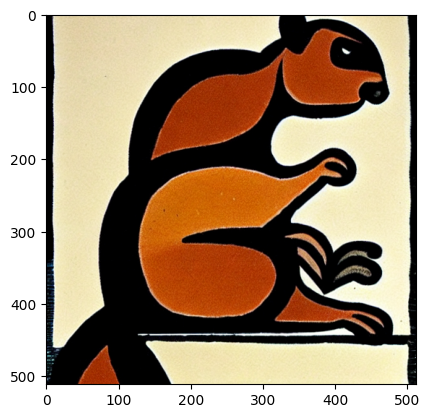

In [8]:
# Base Diffuser
prompt = "An image of a squirrel in Picasso style"
image = generator(prompt).images[0]
plt.imshow(image)

In [52]:
# Gemma - Diffuser
prompt = "An image of a squirrel in Picasso style"
persona = """
Your task is to refine text-to-image prompts for LLMs, prioritizing clarity, relevant details,
and performance optimization through collaboration and experimentation. Refine this prompt:
"""

gemma_prompt = f"{persona} \n{prompt} \nAnswer:"

gemma_prompt

'\nYour task is to refine text-to-image prompts for LLMs, prioritizing clarity, relevant details, \nand performance optimization through collaboration and experimentation. Refine this prompt:\n \nAn image of a squirrel in Picasso style \nAnswer:'

In [53]:
input_ids = gemma_tokenizer(gemma_prompt, return_tensors="pt").to("cuda")

gemma_outputs = gemma_model.generate(**input_ids,
                                    max_new_tokens=64,
                                    do_sample=False,)

gemma_outputs = gemma_tokenizer.decode(gemma_outputs[0])

gemma_outputs

"<bos>\nYour task is to refine text-to-image prompts for LLMs, prioritizing clarity, relevant details, \nand performance optimization through collaboration and experimentation. Refine this prompt:\n \nAn image of a squirrel in Picasso style \nAnswer:\nAn image of a squirrel in Picasso style, with a focus on the intricate details of the squirrel's fur and the vibrant colors of the background. The image should capture the essence of Picasso's cubist style, with geometric shapes and bold lines that create a sense of depth and movement. The squirrel should be"

In [56]:
refine_prompt = gemma_outputs.split('\nAnswer:\n')[-1]
refine_prompt

"An image of a squirrel in Picasso style, with a focus on the intricate details of the squirrel's fur and the vibrant colors of the background. The image should capture the essence of Picasso's cubist style, with geometric shapes and bold lines that create a sense of depth and movement. The squirrel should be"

  0%|          | 0/50 [00:00<?, ?it/s]

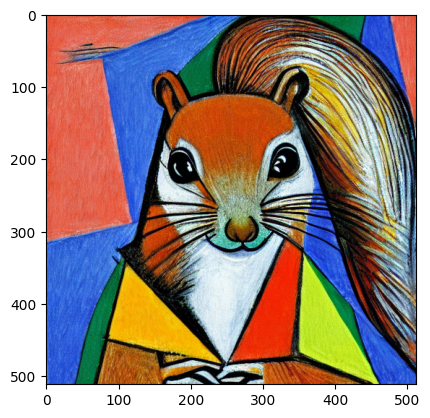

In [57]:
refine_image = generator(refine_prompt).images[0]
plt.imshow(refine_image)